<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [2]:
import tensorflow as t

In [3]:
s=t.constant(99.99)

### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [4]:
v=t.constant([9,8,7,6,5])

### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [5]:
v=t.add(v,7)

### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [6]:
m=t.constant([[1, 2, 3], [ 4,5,6]])

### Change the shape of the above created tensor to shape (3,2)

In [7]:
m=t.reshape(m,[3,2])

### Check the dtype, number of axes and the shape of tensor

In [8]:
m.dtype

tf.int32

In [9]:
m.ndim

2

In [10]:
m.shape

TensorShape([3, 2])

- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [11]:
import pandas as p

In [12]:
from google.colab import files

uploaded = files.upload()

Saving car_data-1.csv to car_data-1.csv


## Question 1

### Load the data
- Load the data, check the shape of data

In [13]:
d=p.read_csv('car_data-1.csv')

In [14]:
d.shape

(8128, 11)

In [15]:
d

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [16]:
d['engine']=d['engine'].str.extract('(\d*\.\d+|\d+)',expand=False).astype(float)

In [17]:
d['mileage']=d['mileage'].str.extract('(\d*\.\d+|\d+)',expand=False).astype(float)

In [18]:
d['max_power']=d['max_power'].str.extract('(\d*\.\d+|\d+)',expand=False).astype(float)

In [19]:
d.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [20]:
s={'First Owner':2, 'Second Owner':3, 'Third Owner':4,
       'Fourth & Above Owner':5, 'Test Drive Car':1}
d['owner']=d['owner'].map(s)

In [21]:
d=p.get_dummies(d,columns=['fuel','seller_type','transmission'])
d

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,2,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,3,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,4,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,2,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,2,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,2,18.50,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1
8124,2007,135000,119000,5,16.80,1493.0,110.00,5.0,0,1,0,0,0,1,0,0,1
8125,2009,382000,120000,2,19.30,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
8126,2013,290000,25000,2,23.57,1396.0,70.00,5.0,0,1,0,0,0,1,0,0,1


In [22]:
d=d.dropna()

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
x=d.drop('selling_price',axis=1)
y=d['selling_price']

In [25]:
xt,xte,yt,yte=train_test_split(x,y,test_size=.25,random_state=12)
s=StandardScaler()

In [26]:
xt

,year,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
3828,2010,100000,4,17.00,1497.0,118.00,5.0,0,0,0,1,0,1,0,0,1
5783,2011,40000,4,19.70,796.0,46.30,5.0,0,0,0,1,0,1,0,0,1
7882,2017,43235,2,24.29,1498.0,99.00,5.0,0,1,0,0,1,0,0,0,1
272,2012,193000,2,19.30,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
7898,2017,120000,2,24.52,1248.0,88.50,7.0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623,2008,120000,3,17.80,1248.0,75.00,5.0,0,1,0,0,0,1,0,0,1
3430,2013,60000,3,21.27,1396.0,88.76,5.0,0,1,0,0,0,1,0,0,1
1460,2014,25000,2,16.02,1373.0,93.70,7.0,0,0,0,1,0,1,0,0,1
5956,2018,9000,2,19.10,1197.0,85.80,5.0,0,0,0,1,1,0,0,0,1


In [27]:
xte

,year,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
1543,2017,52000,2,17.00,1197.0,81.86,5.0,0,0,0,1,0,1,0,0,1
1762,2011,168000,3,12.80,2494.0,102.00,8.0,0,1,0,0,0,1,0,0,1
3477,2016,50000,3,18.16,1196.0,86.80,5.0,0,0,0,1,0,1,0,0,1
63,2013,60000,2,21.27,1396.0,88.76,5.0,0,1,0,0,0,1,0,0,1
3950,2012,67000,2,20.77,1248.0,88.76,7.0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,2018,18000,2,15.04,1991.0,183.00,5.0,0,0,0,1,1,0,0,1,0
659,2017,56290,2,24.00,1186.0,73.97,5.0,0,1,0,0,1,0,0,0,1
798,2011,137500,4,19.30,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
2548,2012,98000,2,25.44,936.0,57.60,5.0,0,1,0,0,0,1,0,0,1


In [28]:
xt=s.fit_transform(xt)
xt

array([[-1.02529947,  0.54222919,  2.22565283, ..., -0.17846076,
        -0.39408131,  0.39408131],
       [-0.76671763, -0.51181451,  2.22565283, ..., -0.17846076,
        -0.39408131,  0.39408131],
       [ 0.78477344, -0.45498398, -0.62689703, ..., -0.17846076,
        -0.39408131,  0.39408131],
       ...,
       [ 0.0090279 , -0.77532543, -0.62689703, ..., -0.17846076,
        -0.39408131,  0.39408131],
       [ 1.04335528, -1.05640375, -0.62689703, ..., -0.17846076,
        -0.39408131,  0.39408131],
       [ 1.30193713, -1.15869869, -0.62689703, ..., -0.17846076,
        -0.39408131,  0.39408131]])

In [29]:
xte=s.fit_transform(xte)
xte

array([[ 0.76841299, -0.30775103, -0.63521176, ..., -0.16597222,
        -0.37522834,  0.37522834],
       [-0.78942583,  1.74965061,  0.75242764, ..., -0.16597222,
        -0.37522834,  0.37522834],
       [ 0.50877319, -0.34322347,  0.75242764, ..., -0.16597222,
        -0.37522834,  0.37522834],
       ...,
       [-0.78942583,  1.20869587,  2.14006703, ..., -0.16597222,
        -0.37522834,  0.37522834],
       [-0.52978602,  0.50811514, -0.63521176, ..., -0.16597222,
        -0.37522834,  0.37522834],
       [ 0.50877319, -1.08904931, -0.63521176, ..., -0.16597222,
        -0.37522834,  0.37522834]])

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [30]:
from tensorflow.keras import Sequential,layers
m=Sequential([layers.Input(shape=16),layers.Dense(64,activation='relu'),layers.Dropout(.2),layers.Dense(128,activation='relu'),layers.Dropout(.2),layers.Dense(32,activation='relu'),layers.Dropout(.2),layers.Dense(1,activation='linear')])

### Check model summary and visualize the model

In [31]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [32]:
from keras.utils.vis_utils import plot_model

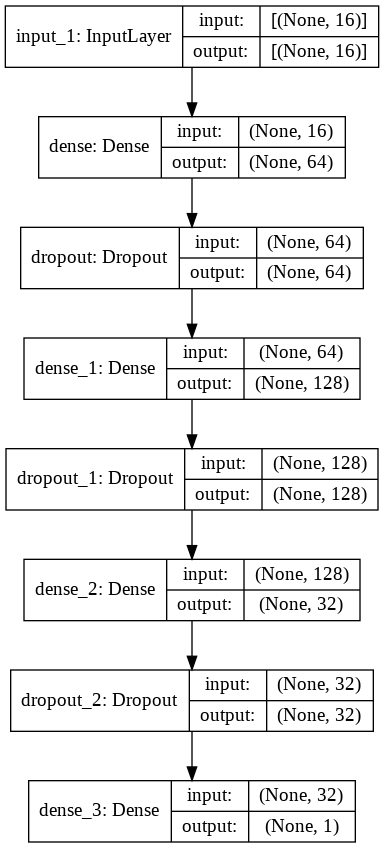

In [33]:
plot_model(m,show_layer_names=True,show_shapes=True,to_file='model_plt.png')

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [34]:
def c(y,yp):
    from keras import backend as b
    s=b.sum(b.square(y-yp))
    st=b.sum(b.square(y-b.mean(y)))
    return (1-s/(st+b.epsilon()))

In [35]:
m.compile(optimizer='adam',loss='mae',metrics=[c])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [36]:
from keras.callbacks import EarlyStopping,ModelCheckpoint


In [37]:
e=EarlyStopping(patience=10,restore_best_weights=True)
# mc=ModelCheckpoint('m.h5',save_weights_only=True)
h=m.fit(xt,yt,validation_data=(xte,yte),epochs=1000,callbacks=e)

Epoch 1/1000
186/186 [==============================] - 4s 4ms/step - loss: 650673.8676 - c: -1.2324 - val_loss: 648561.4375 - val_c: -1.0133
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 629073.1683 - c: -1.1120 - val_loss: 536761.0000 - val_c: -0.6062
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 462816.1883 - c: -0.4738 - val_loss: 313925.7812 - val_c: 0.2739
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 286004.1367 - c: 0.3453 - val_loss: 248074.1719 - val_c: 0.5486
Epoch 5/1000
186/186 [==============================] - 0s 3ms/step - loss: 256085.7294 - c: 0.5211 - val_loss: 225336.2500 - val_c: 0.6193
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 219448.3838 - c: 0.5964 - val_loss: 212267.8281 - val_c: 0.6541
Epoch 7/1000
186/186 [==============================] - 1s 3ms/step - loss: 213548.5886 - c: 0.6052 - val_loss: 203567.3906 - val_c: 0.6762
Epoch 8/1000
18

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [38]:
m.evaluate(xte,yte)

62/62 [==============================] - 0s 1ms/step - loss: 118843.7188 - c: 0.8875


[118843.71875, 0.8875362277030945]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

In [39]:
import matplotlib.pyplot as pl
import seaborn as s

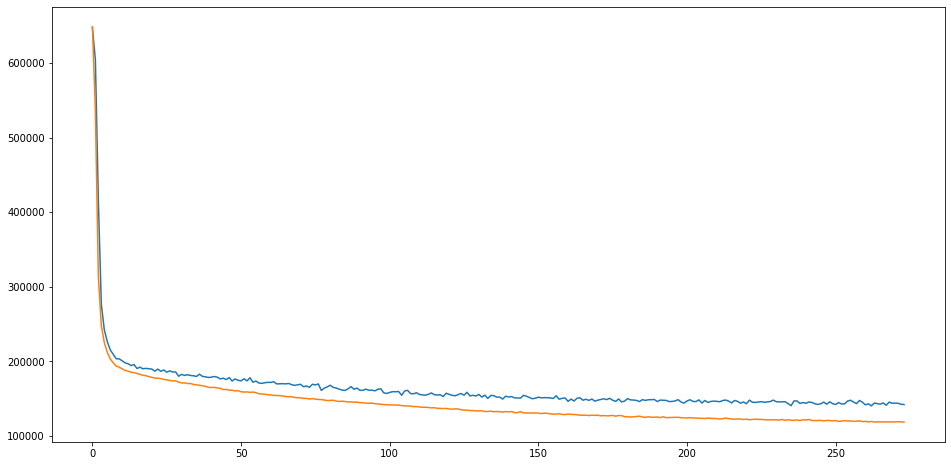

In [40]:
pl.figure(figsize=(16, 8))
s.lineplot(x=h.epoch, y=h.history['loss'])
s.lineplot(x=h.epoch, y=h.history['val_loss'])
pl.show()

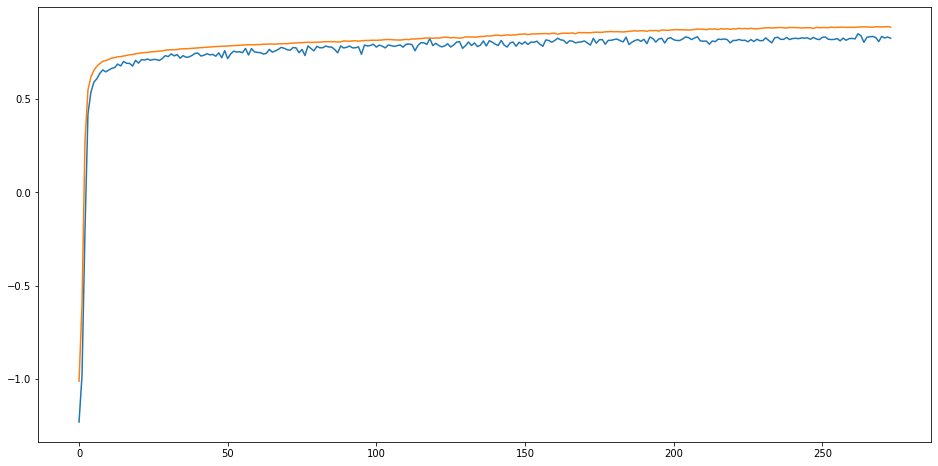

In [42]:
pl.figure(figsize=(16, 8))
s.lineplot(x=h.epoch, y=h.history['c'])
s.lineplot(x=h.epoch, y=h.history['val_c'])
pl.show()

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss